In [1]:
from __future__ import print_function
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Dropout
from keras.layers import Flatten, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.callbacks import ReduceLROnPlateau
from keras.layers.advanced_activations import PReLU
import os

C:\Users\david\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
num_classes = 10
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
datagen = ImageDataGenerator(
     featurewise_center=False,  # set input mean to 0 over the dataset
     samplewise_center=False,  # set each sample mean to 0
     featurewise_std_normalization=False,  # divide inputs by std of the dataset
     samplewise_std_normalization=False,  # divide each input by its std
     zca_whitening=False,  # apply ZCA whitening
     zca_epsilon=1e-06,  # epsilon for ZCA whitening
     rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
     # randomly shift images horizontally (fraction of total width)
     width_shift_range=0.1,
     # randomly shift images vertically (fraction of total height)
     height_shift_range=0.1,
     shear_range=0.,  # set range for random shear
     zoom_range=0.,  # set range for random zoom
     channel_shift_range=0.,  # set range for random channel shifts
     # set mode for filling points outside the input boundaries
     fill_mode='nearest',
     cval=0.,  # value used for fill_mode = "constant"
     horizontal_flip=True,  # randomly flip images
     vertical_flip=False,  # randomly flip images
     # set rescaling factor (applied before any other transformation)
     rescale=None,
     # set function that will be applied on each input
     preprocessing_function=None,
     # image data format, either "channels_first" or "channels_last"
     data_format=None,
     # fraction of images reserved for validation (strictly between 0 and 1)
     validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

In [7]:
#model
color = Input(shape=(x_train.shape[1:]))
conv11 = Conv2D(128, (3, 3), activation=PReLU(), padding='same')(color)
batch11 = BatchNormalization()(conv11)
conv12 = Conv2D(128, (3, 3), activation=PReLU(), padding='same')(batch11)
batch12 = BatchNormalization()(conv12)
conv122 = Conv2D(128, (3, 3), activation=PReLU(), padding='same')(batch12)
batch122 = BatchNormalization()(conv122)
pool11 = MaxPooling2D(pool_size=(2, 2))(batch122)
drop1 = Dropout(.2)(pool11)
conv13 = Conv2D(196, (3, 3), activation=PReLU(), padding='same')(drop1)
batch13 = BatchNormalization()(conv13)
conv133 = Conv2D(196, (3, 3), activation=PReLU(), padding='same')(batch13)
batch133 = BatchNormalization()(conv133)
conv14 = Conv2D(196, (3, 3), activation=PReLU(), padding='same')(batch13)
batch14 = BatchNormalization()(conv14)
pool13 = MaxPooling2D(pool_size=(2, 2))(batch14)
drop2 = Dropout(.3)(pool13)
conv15 = Conv2D(256, (3, 3), activation=PReLU(), padding='same')(drop2)
batch15 = BatchNormalization()(conv15)
conv155 = Conv2D(256, (3, 3), activation=PReLU(), padding='same')(batch15)
batch15 = BatchNormalization()(conv155)
conv16 = Conv2D(256, (3, 3), activation=PReLU(), padding='same')(batch15)
batch16 = BatchNormalization()(conv16)
pool15 = AveragePooling2D(pool_size=(8, 8))(batch16)
drop3 = Dropout(.4)(pool15)
flat1 = Flatten()(drop3)
output = Dense(num_classes, activation='softmax')(flat1)
model = Model(inputs=color, outputs=output)
model.compile(loss='mean_squared_error',
              optimizer='Adam',
              metrics=['accuracy'])

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.000001)



cnn = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                        epochs=75, validation_data=(x_test, y_test), 
                        workers=4, callbacks=[learning_rate_reduction])

C:\Users\david\Anaconda3\lib\site-packages\keras\activations.py:197: UserWarning: Do not pass a layer instance (such as PReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  identifier=identifier.__class__.__name__))


Epoch 1/75
1563/1563 [==============================] - 60s 38ms/step - loss: 0.0662 - acc: 0.4678 - val_loss: 0.0505 - val_acc: 0.6185
Epoch 2/75
1563/1563 [==============================] - 42s 27ms/step - loss: 0.0457 - acc: 0.6608 - val_loss: 0.0419 - val_acc: 0.7013
Epoch 3/75
1563/1563 [==============================] - 42s 27ms/step - loss: 0.0366 - acc: 0.7340 - val_loss: 0.0389 - val_acc: 0.7205
Epoch 4/75
1563/1563 [==============================] - 42s 27ms/step - loss: 0.0316 - acc: 0.7743 - val_loss: 0.0318 - val_acc: 0.7764
Epoch 5/75
1563/1563 [==============================] - 42s 27ms/step - loss: 0.0284 - acc: 0.7988 - val_loss: 0.0259 - val_acc: 0.8202
Epoch 6/75
1563/1563 [==============================] - 42s 27ms/step - loss: 0.0257 - acc: 0.8194 - val_loss: 0.0267 - val_acc: 0.8166
Epoch 7/75
1563/1563 [==============================] - 42s 27ms/step - loss: 0.0241 - acc: 0.8314 - val_loss: 0.0242 - val_acc: 0.8334
Epoch 8/75
1563/1563 [==========================

1563/1563 [==============================] - 42s 27ms/step - loss: 0.0030 - acc: 0.9810 - val_loss: 0.0123 - val_acc: 0.9214
Epoch 60/75
1563/1563 [==============================] - 42s 27ms/step - loss: 0.0031 - acc: 0.9801 - val_loss: 0.0122 - val_acc: 0.9230
Epoch 61/75
1563/1563 [==============================] - 43s 27ms/step - loss: 0.0030 - acc: 0.9810 - val_loss: 0.0120 - val_acc: 0.9224

Epoch 00061: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Epoch 62/75
1563/1563 [==============================] - 42s 27ms/step - loss: 0.0027 - acc: 0.9827 - val_loss: 0.0121 - val_acc: 0.9225
Epoch 63/75
1563/1563 [==============================] - 42s 27ms/step - loss: 0.0027 - acc: 0.9824 - val_loss: 0.0121 - val_acc: 0.9238
Epoch 64/75
1563/1563 [==============================] - 42s 27ms/step - loss: 0.0026 - acc: 0.9833 - val_loss: 0.0122 - val_acc: 0.9232
Epoch 65/75
1563/1563 [==============================] - 42s 27ms/step - loss: 0.0027 - acc: 0.9823 - val_loss

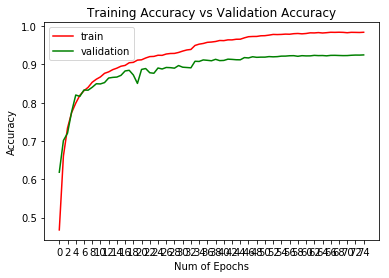

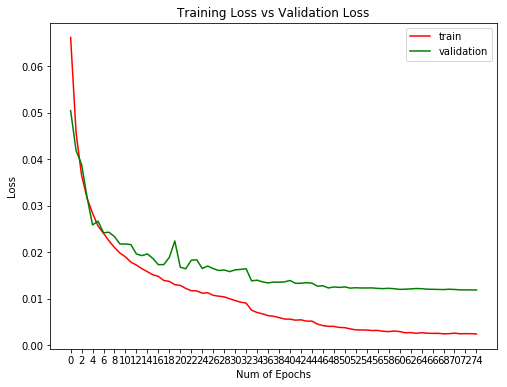

10000/10000 [==============================] - 3s 266us/step
Test loss: 0.011911306644513389
Test accuracy: 0.925


In [8]:
plt.figure(0)
plt.plot(cnn.history['acc'],'r')
plt.plot(cnn.history['val_acc'],'g')
plt.xticks(np.arange(0, 76, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(cnn.history['loss'],'r')
plt.plot(cnn.history['val_loss'],'g')
plt.xticks(np.arange(0, 76, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])